<strong>Análise de dados</strong>
1. Carregar o dataset e verificar suas informações gerais;
2. Examinar as estatísticas descritivas das variáveis numéricas, verificando médias,
medianas, desvios padrão, mínimos e máximos.
3. Analisar a distribuição de frequências das variáveis categóricas.
4. Verificar a representatividade de homens e mulheres nas aplicações e admissões por
departamento.
5. Comparar o número total de candidatos (admitidos e rejeitados) por gênero.
6. Comparar as taxas de admissão por departamento e gênero.
7. Comparar as taxas de admissão agregadas e desagregadas por departamento.
8. Verificar a relação entre o número de candidatos e as taxas de admissão/rejeição por
gênero e departamento.
9. Comparar as taxas de admissão agregadas para homens e mulheres.
10. Analisar como as taxas de admissão de homens e mulheres variam entre os
departamentos.
11. Identificar quais departamentos têm as maiores e menores taxas de rejeição.
12. Avaliar a proporção de inscrições feitas por homens e mulheres nos departamentos mais
e menos competitivos.
13. Comparar as taxas de admissão gerais com as taxas de admissão por departamento.
14. Verificar se existem preferências de departamentos por gênero que podem influenciar os
resultados observados.
<br>


<strong>Questionamentos a serem respondidos durante a análise de dados</strong>
1. Há departamentos ou gêneros que apresentam taxas de admissão ou rejeição
desproporcionalmente altas ou baixas?
2. Há equilíbrio na distribuição de gêneros nos departamentos?
3. Como os padrões de admissão diferem entre os departamentos e gêneros?
4. Existe um viés aparente contra algum gênero?
5. Há departamentos mais favoráveis a um gênero específico?
6. Quais departamentos são mais competitivos e como isso afeta os gêneros?
7. Como as conclusões mudam ao desagregar os dados por departamento?

<p style="color: yellow;">1. Carregar o dataset e verificar suas informações gerais;</p>

In [120]:
import pandas as pd

#Abre o arquivo
df = pd.read_csv('output.csv')

# Exibe as primeiras linhas do DataFrame
print(df.head(10))

   Unnamed: 0 Major Gender Admission
0           0     C      F  Rejected
1           1     B      M  Accepted
2           6     F      F  Accepted
3           9     A      M  Accepted
4          11     B      M  Accepted
5          12     C      M  Rejected
6          13     A      M  Rejected
7          16     A      M  Accepted
8          19     F      M  Rejected
9          21     C      M  Accepted


In [121]:
# Deleta a primeira coluna
df = df.drop(df.columns[0], axis=1)


print(df)

     Major Gender Admission
0        C      F  Rejected
1        B      M  Accepted
2        F      F  Accepted
3        A      M  Accepted
4        B      M  Accepted
...    ...    ...       ...
4834     A      M  Accepted
4835     F      M  Rejected
4836     A      M  Accepted
4837     A      M  Accepted
4838     D      M  Accepted

[4839 rows x 3 columns]


<p style="color: yellow;">2. Examinar as estatísticas descritivas das variáveis numéricas, verificando médias,
medianas, desvios padrão, mínimos e máximos.</p>

<i> Como os dados são categóricos não será possivel realizar a análise das variáveis numéricas, verificando médias,
medianas, desvios padrão, mínimos e máximos... </i>

<p style="color: yellow;">3. Analisar a distribuição de frequências das variáveis categóricas.</p>

In [122]:
#Distribuição de candidatos inscritos por Categoria
Distribuição = df['Major'].value_counts()

# Reordena a Distribuição em ordem alfabética dos índices
Distribuição = Distribuição.sort_index()

Distribuição



Major
A    1246
B     585
C     918
D     792
E     584
F     714
Name: count, dtype: int64

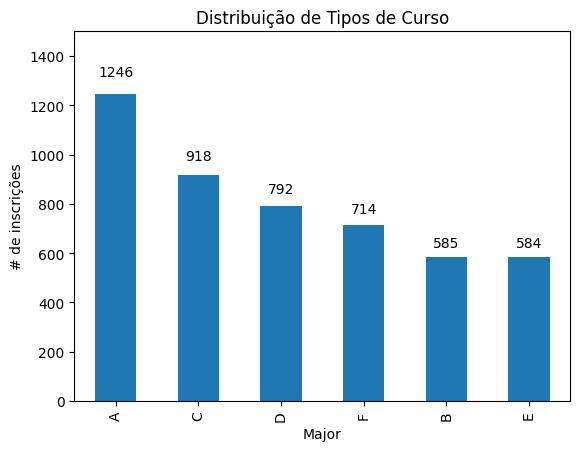

In [123]:
import matplotlib.pyplot as plt

#Cria um gráfico de barras baseado no número de inscrições por curso

value_counts = df['Major'].value_counts()


ax = value_counts.plot(kind='bar')
ax.set_ylim(top=1500)


for i, value in enumerate(value_counts):
    ax.text(i, value + 0.05 * value, str(value), ha='center', va='bottom')

plt.title('Distribuição de Tipos de Curso')
plt.xlabel('Major')
plt.ylabel('# de inscrições')


plt.show()


<p style="color: yellow;">4. Verificar a representatividade de homens e mulheres nas aplicações e admissões por
departamento.</p>

In [124]:
#Agrupa por genero
grouped = df.groupby(['Major', 'Gender']).size().unstack(fill_value=0)


grouped

Gender,F,M
Major,,
A,108,1138
B,25,560
C,593,325
D,375,417
E,393,191
F,341,373


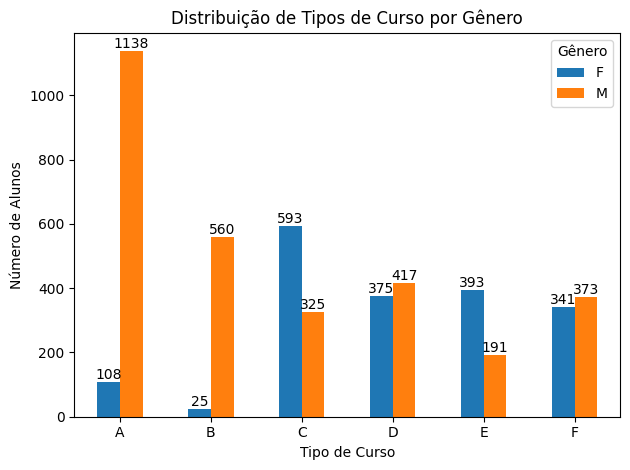

In [125]:
#Cria um gráfico de barras baseado no número de inscrições por curso e por gênero

ax = grouped.plot(kind='bar', stacked=False)

for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom'
    )

plt.title('Distribuição de Tipos de Curso por Gênero')
plt.xlabel('Tipo de Curso')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0) 
plt.legend(title='Gênero') 


plt.tight_layout()


plt.show()


<p style="color: yellow;">5. Comparar o número total de candidatos (admitidos e rejeitados) por gênero.</p>

In [126]:
# Distribuição de Sexo entre os aplicantes
df['Gender'].value_counts()



Gender
M    3004
F    1835
Name: count, dtype: int64

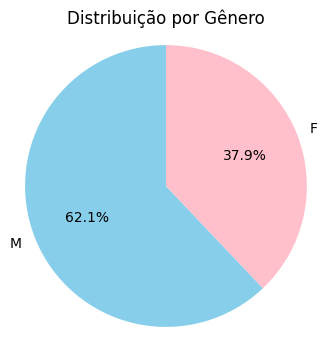

In [127]:

#Distribuição dos inscritos por gênero
gender_counts = df['Gender'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,  
    colors=['skyblue', 'pink']
)

plt.title('Distribuição por Gênero')
plt.axis('equal')  

plt.show()

In [128]:
# Agrupamento pela quantidade de candidatos aprovados
Gender_Admission = df.groupby(['Admission', 'Gender']).size().unstack(fill_value=0)


Gender_Admission

Gender,F,M
Admission,,
Accepted,557,1511
Rejected,1278,1493


In [129]:
# total por gênero
total_por_sexo = df.shape[0]


# número de aprovações por gênero
aprovados_por_sexo = df[df['Admission'] == 'Accepted'].groupby('Gender').size()

# Porcentagem de aprovação por gênero
porcentagem_aprovacao_por_sexo = round((aprovados_por_sexo / total_por_sexo) * 100,2)
print('Percentual de provação baseado no total de inscritos por gênero')
porcentagem_aprovacao_por_sexo


Percentual de provação baseado no total de inscritos por gênero


Gender
F    11.51
M    31.23
dtype: float64

<p style="color: yellow;">6. Comparar as taxas de admissão por departamento e gênero.</p>

In [130]:
#Distribuição por aprovados/reprovados por departamento
Admission = df.groupby(['Major', 'Admission']).size().unstack(fill_value=0)

print("Admissão por Departamento")
Admission

Admissão por Departamento


Admission,Accepted,Rejected
Major,,
A,914,332
B,370,215
C,321,597
D,269,523
E,147,437
F,47,667


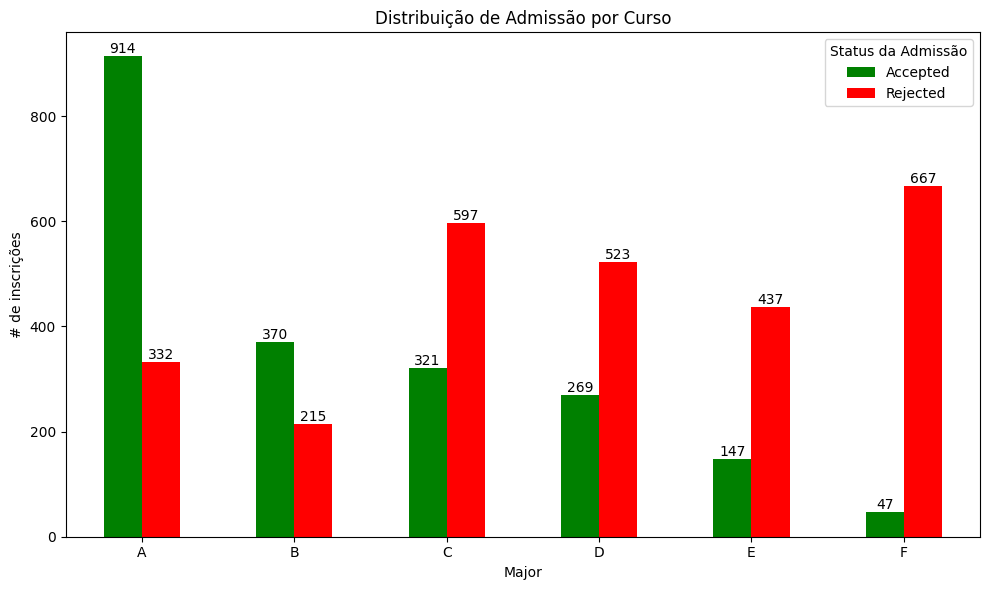

In [131]:
#Gráfico comparando as aprovações e reprovações por curso
ax = Admission.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'red'])

for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom'
    )

plt.title('Distribuição de Admissão por Curso')
plt.xlabel('Major')
plt.ylabel('# de inscrições')
plt.xticks(rotation=0) 
plt.legend(title='Status da Admissão') 


plt.tight_layout()


plt.show()

In [137]:
# Conta aprovados por gênero e major
Aprovados = df[df['Admission'] == 'Accepted'].groupby(['Major', 'Gender']).size().unstack(fill_value=0)

# Atribui essas contagens ao DataFrame grouped
grouped['F_Approved'] = Aprovados['F']
grouped['M_Approved'] = Aprovados['M']


grouped['F_%'] = round((grouped['F_Approved'] / grouped['F']) * 100, 1)
grouped['M_%'] = round((grouped['M_Approved'] / grouped['M']) * 100, 1)

print("Admissão por Departamento e Genero")
grouped

Admissão por Departamento e Genero


Gender,F,M,F_Approved,M_Approved,F_%,M_%
Major,,,,,,
A,108,1138,89,825,82.4,72.5
B,25,560,17,353,68.0,63.0
C,593,325,201,120,33.9,36.9
D,375,417,131,138,34.9,33.1
E,393,191,94,53,23.9,27.7
F,341,373,25,22,7.3,5.9


<p style="color: yellow;">7. Comparar as taxas de admissão agregadas e desagregadas por departamento.
</br>
8. Verificar a relação entre o número de candidatos e as taxas de admissão/rejeição por
gênero e departamento.</p>

In [133]:
# Calcula as taxas de admissão desagregadas por gênero e departamento
grouped_desagregado = df.groupby(['Major', 'Gender', 'Admission']).size().unstack(fill_value=0)
grouped_desagregado['Total'] = grouped_desagregado['Accepted'] + grouped_desagregado['Rejected']
grouped_desagregado['Acceptance Rate (%)'] = round((grouped_desagregado['Accepted'] / grouped_desagregado['Total']) * 100,)


print("Desagregado por Gênero e Departamento:")

grouped_desagregado


Desagregado por Gênero e Departamento:


Admission     Accepted  Rejected  Total  Acceptance Rate (%)
Major Gender                                                
A     F             89        19    108                 82.0
      M            825       313   1138                 72.0
B     F             17         8     25                 68.0
      M            353       207    560                 63.0
C     F            201       392    593                 34.0
      M            120       205    325                 37.0
D     F            131       244    375                 35.0
      M            138       279    417                 33.0
E     F             94       299    393                 24.0
      M             53       138    191                 28.0
F     F             25       316    341                  7.0
      M             22       351    373                  6.0

In [134]:
#relação entre o número de candidatos e as taxas de admissão/rejeição por departamento.

# agrupa por Adimissão/Categoria
Relation = df.groupby(['Major', 'Admission']).size().unstack(fill_value=0)

Relation['Total'] = Relation['Accepted'] + Relation['Rejected']

# Calcula as taxas
Relation['Acceptance Rate (%)'] = round((Relation['Accepted'] / Relation['Total']) * 100,2)
Relation['Rejection Rate (%)'] = round((Relation['Rejected'] / Relation['Total']) * 100,2)

print("Agregados por Departamento:")
Relation


Agregados por Departamento:


Admission,Accepted,Rejected,Total,Acceptance Rate (%),Rejection Rate (%)
Major,,,,,
A,914,332,1246,73.35,26.65
B,370,215,585,63.25,36.75
C,321,597,918,34.97,65.03
D,269,523,792,33.96,66.04
E,147,437,584,25.17,74.83
F,47,667,714,6.58,93.42


<p style="color: yellow;">9. Comparar as taxas de admissão agregadas para homens e mulheres.</p>

<i>Se removermos a categoria "others" temos os dados abaixo</i>

In [135]:
#total de aprovações por sexo
total_por_sexo = df.groupby('Gender').size()

#número de aprovações por sexo
aprovados_por_sexo = df[df['Admission'] == 'Accepted'].groupby('Gender').size()

#porcentagem de aprovação por sexo
porcentagem_aprovacao_por_sexo = round((aprovados_por_sexo / total_por_sexo) * 100,2)
print(porcentagem_aprovacao_por_sexo)



Gender
F    30.35
M    50.30
dtype: float64


<i>Cerca de 50 dos Homens inscritos nas Majors A, B, C, D e F foram aprovados.</i>

<p style="color: yellow;">10. Analisar como as taxas de admissão de homens e mulheres variam entre os departamentos</p>

In [138]:
grouped_Edited = grouped.drop(columns=['F_Approved','M_Approved'])

grouped_Edited['Delta'] = grouped_Edited['F_%'] - grouped_Edited['M_%']

grouped_Edited

Gender,F,M,F_%,M_%,Delta
Major,,,,,
A,108,1138,82.4,72.5,9.9
B,25,560,68.0,63.0,5.0
C,593,325,33.9,36.9,-3.0
D,375,417,34.9,33.1,1.8
E,393,191,23.9,27.7,-3.8
F,341,373,7.3,5.9,1.4


<i>Analisando os dados acima é possível perceber que somente nos Majors C e E que os homens tiveram indice de aprovação maior do que as mulheres.</i>

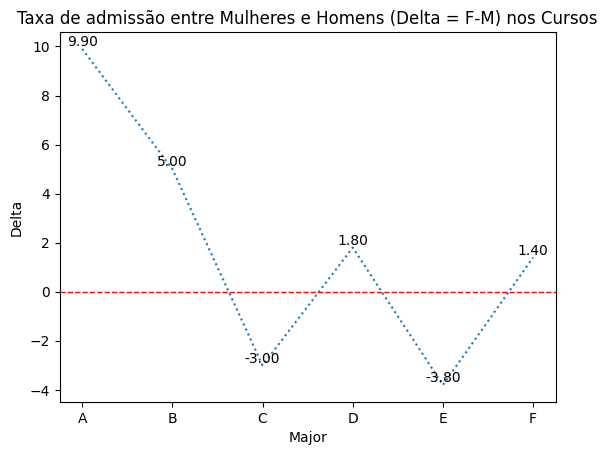

In [114]:
# Plot the data
plt.plot(grouped_Edited['Delta'], linestyle='dotted')

# Add values on the plot with two decimal places
for i, value in enumerate(grouped_Edited['Delta']):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.title('Taxa de admissão entre Mulheres e Homens (Delta = F-M) nos Cursos')
plt.xlabel('Major')
plt.ylabel('Delta')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.show()

<p style="color: yellow;">11. Identificar quais departamentos têm as maiores e menores taxas de rejeição.</p>

In [115]:
#Distribuição de candidatos inscritos por Categoria
Inscricao = df.groupby('Major').size()
Reprovados = df[df['Admission'] == 'Rejected'].groupby('Major').size()
Aprovados =  df[df['Admission'] == 'Accepted'].groupby('Major').size()

#Mostra o % de reprovação
Reprovados_Result = round((Reprovados / Inscricao )*100,2)

print("Taxa de reprovados")
print(Reprovados_Result)

print('\nTaxa de Aprovados')
Aprovados_Result = round((Aprovados / Inscricao )*100,2)
print(Aprovados_Result)

Taxa de reprovados
Major
A    26.65
B    36.75
C    65.03
D    66.04
E    74.83
F    93.42
dtype: float64

Taxa de Aprovados
Major
A    73.35
B    63.25
C    34.97
D    33.96
E    25.17
F     6.58
dtype: float64


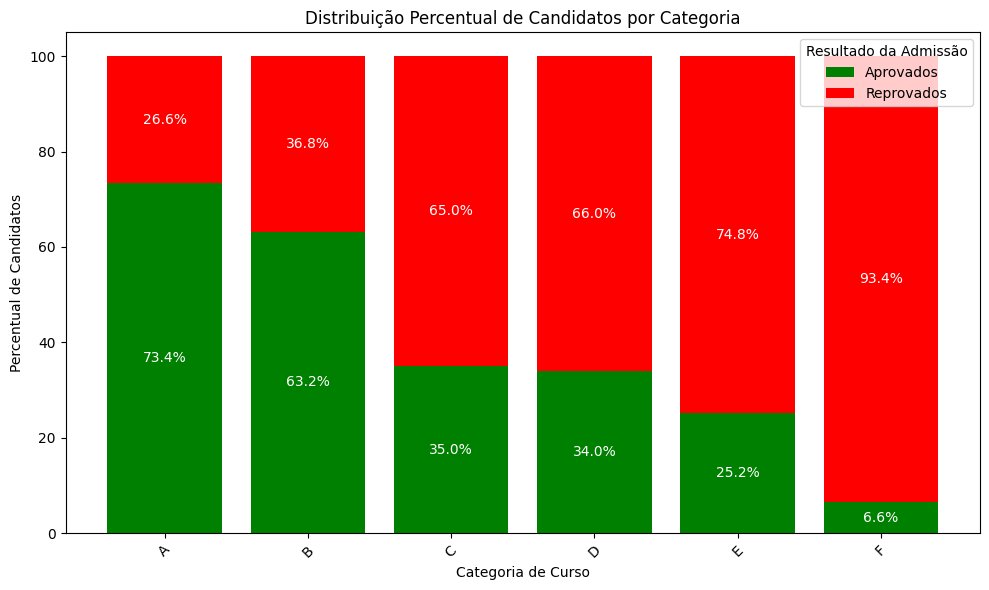

In [116]:
Reprovados = Reprovados.reindex(Inscricao.index, fill_value=0)
Aprovados = Aprovados.reindex(Inscricao.index, fill_value=0)

# Calcula as porcentagens
Reprovados_Percent = (Reprovados / Inscricao) * 100
Aprovados_Percent = (Aprovados / Inscricao) * 100


plt.figure(figsize=(10, 6))
plt.bar(Inscricao.index, Aprovados_Percent, label='Aprovados', color='green')
plt.bar(Inscricao.index, Reprovados_Percent, bottom=Aprovados_Percent, label='Reprovados', color='red')


for i, (aprovado, reprovado) in enumerate(zip(Aprovados_Percent, Reprovados_Percent)):
    total = aprovado + reprovado
    plt.text(i, aprovado / 2, f'{aprovado:.1f}%', ha='center', va='center', color='white')
    plt.text(i, aprovado + reprovado / 2, f'{reprovado:.1f}%', ha='center', va='center', color='white')

plt.title('Distribuição Percentual de Candidatos por Categoria')
plt.xlabel('Categoria de Curso')
plt.ylabel('Percentual de Candidatos')
plt.xticks(rotation=45)  
plt.legend(title='Resultado da Admissão')


plt.tight_layout()


plt.show()

<i>Com base nos dados acima, percebe-se que os A e B possuem menor indice de reprovação e os cursos C, D, E, F possuem um maior indice de reprovação.</i>

<p style="color: yellow;">12. Avaliar a proporção de inscrições feitas por homens e mulheres nos departamentos mais
e menos competitivos. </p>

In [117]:
#Distribuição por aprovados/reprovados por departamento
Admission_12 = df.groupby(['Major','Gender']).size().unstack(fill_value=0)

Admission_12['Inscritos_F'] = round(Admission_12['F']/(Admission_12['F'] + Admission_12['M'])*100,2)
Admission_12['Inscritos_M'] = round(Admission_12['M']/(Admission_12['F'] + Admission_12['M'])*100,2)

print("Admissão por Departamento")

Admission_12

Admissão por Departamento


Gender,F,M,Inscritos_F,Inscritos_M
Major,,,,
A,108,1138,8.67,91.33
B,25,560,4.27,95.73
C,593,325,64.60,35.40
D,375,417,47.35,52.65
E,393,191,67.29,32.71
F,341,373,47.76,52.24


<i>Baseado nos dados acima é possível notar que os homens tiveram a tendência/maior proporção de se inscrever nos cursos mais fáceis A e B, o único curso mais difícil que teve uma maior proporção masculina foi o curso D
<br>

No caso das mulhres a grande proporção de inscrições estão nos cursos C, E e F, onde o E e F são considerados os mais difíceis


</i>

<p style="color: yellow;">13. Comparar as taxas de admissão gerais com as taxas de admissão por departamento.<p>

In [118]:
#Calculo da taxa de aprovação global

Accepted_general = df[df['Admission'] == 'Accepted'].shape[0]
Perc_Acepted_General = round((Accepted_general / df.shape[0])*100,2)
print(f"\nPercentual de aprovação global", Perc_Acepted_General, "%")



#aprovados por gênero e major
Aprovados_13 = df[df['Admission'] == 'Accepted'].groupby(['Major', 'Gender']).size().unstack(fill_value=0)

# Atribui essas contagens ao DataFrame grouped
grouped['F_Approved'] = Aprovados_13['F']

grouped['M_%'] = round((grouped['M_Approved'] / grouped['M']) * 100, 1)
grouped['F_%'] = round((grouped['F_Approved'] / grouped['F']) * 100, 1)


grouped['% Aprovados'] = Aprovados_Result
grouped['Delta_Glonal'] = Aprovados_Result - Perc_Acepted_General

print('\nTaxa de admissão por departamento\n')
print(grouped)





Percentual de aprovação global 42.74 %

Taxa de admissão por departamento

Gender    F     M  F_Approved  M_Approved   F_%   M_%  % Aprovados  \
Major                                                                
A       108  1138          89         825  82.4  72.5        73.35   
B        25   560          17         353  68.0  63.0        63.25   
C       593   325         201         120  33.9  36.9        34.97   
D       375   417         131         138  34.9  33.1        33.96   
E       393   191          94          53  23.9  27.7        25.17   
F       341   373          25          22   7.3   5.9         6.58   

Gender  Delta_Glonal  
Major                 
A              30.61  
B              20.51  
C              -7.77  
D              -8.78  
E             -17.57  
F             -36.16  


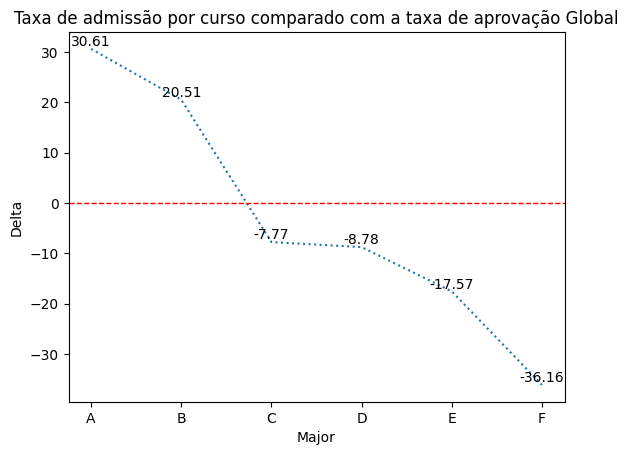

In [119]:

plt.plot(grouped['Delta_Glonal'], linestyle='dotted')


for i, value in enumerate(grouped['Delta_Glonal']):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.title('Taxa de admissão por curso comparado com a taxa de aprovação Global')
plt.xlabel('Major')
plt.ylabel('Delta')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)


plt.show()

<i> Se compararmos com a taxa de aprovação global, os cursos A e B possuiram maior indice de aprovação, mas se compararmos com os restantes dos cursos todos tiveram valores inferiores a taxa de aprovação global.


<p style="color: yellow;">14. Verificar se existem preferências de departamentos por gênero que podem influenciar os
resultados observados.<p>




Verificação do percentual dos aprovados nos cursos:

Mais fáceis: A, B, C

Mais difíceis: D, E, F

In [ ]:
#Agrupamento pela quantidade de inscrição nas matérias fáceis e difíceis
grouped.reset_index(inplace=True)
grouped.rename(columns={'index': 'Major'}, inplace=True)


faceis = grouped[grouped['Major'].isin(['A', 'B', 'C'])]
Faceis_F_Insc = faceis['F'].sum()
Faceis_M_Insc = faceis['M'].sum()

dif = grouped[grouped['Major'].isin(['D', 'E', 'F'])]
Dif_F_Insc = dif['F'].sum()
Dif_M_Insc = dif['M'].sum()

print(f'Quantidade de Mulheres inscritas nas matérias Fáceis: {Faceis_F_Insc}')
print(f'Quantidade de Homens inscritos nas matérias Fáceis: {Faceis_M_Insc}')
print(f'Quantidade de Mulheres inscritas nas matérias Difíceis: {Dif_F_Insc}')
print(f'Quantidade de Homens inscritos nas matérias Difíceis: {Dif_M_Insc}')

Quantidade de Mulheres inscritas nas matérias Fáceis: 726
Quantidade de Homens inscritos nas matérias Fáceis: 2023
Quantidade de Mulheres inscritas nas matérias Difíceis: 1109
Quantidade de Homens inscritos nas matérias Difíceis: 981


In [27]:
# Filtrar as linhas onde Major é A, B ou C para aprovações
faceis = grouped[grouped['Major'].isin(['A', 'B', 'C'])]
Faceis_F_Approved = faceis['F_Approved'].sum()
Faceis_M_Approved = faceis['M_Approved'].sum()

# Filtrar as linhas onde Major é D, E ou F para aprovações
dif = grouped[grouped['Major'].isin(['D', 'E', 'F'])]
Dif_F_Approved = dif['F_Approved'].sum()
Dif_M_Approved = dif['M_Approved'].sum()

print(f'Quantidade de Mulheres aprovadas nas matérias Fáceis: {Faceis_F_Approved}')
print(f'Quantidade de Homens   aprovados nas matérias Fáceis: {Faceis_M_Approved}')

print(f'Quantidade de Mulheres aprovadas nas matérias Difíceis: {Dif_F_Approved}')
print(f'Quantidade de Homens   aprovados nas matérias Difíceis: {Dif_M_Approved}')

Quantidade de Mulheres aprovadas nas matérias Fáceis: 307
Quantidade de Homens   aprovados nas matérias Fáceis: 1298
Quantidade de Mulheres aprovadas nas matérias Difíceis: 250
Quantidade de Homens   aprovados nas matérias Difíceis: 213


In [28]:
#% De aprovações - Fáceis
Perc_aceis_F_Approved = round(Faceis_F_Approved / Faceis_F_Insc,2)*100
Perc_aceis_M_Approved = round(Faceis_M_Approved / Faceis_M_Insc,2)*100

print(f'% de Homens que foram aprovados nas matérias - FÁCEIS', Perc_aceis_M_Approved, '%')
print(f'% de Mulheres que foram aprovados nas matérias - FÁCEIS', Perc_aceis_F_Approved, '%')

% de Homens que foram aprovados nas matérias - FÁCEIS 64.0 %
% de Mulheres que foram aprovados nas matérias - FÁCEIS 42.0 %


In [29]:
#% De aprovações - Dificeis
Perc_Dif_F_Approved = round(Dif_F_Approved / Dif_F_Insc,2)*100
Perc_Dif_M_Approved = round(Dif_M_Approved / Dif_M_Insc,2)*100

print(f'% de Homens que foram aprovados nas matérias - Difíceis', Perc_Dif_M_Approved, '%')
print(f'% de Mulheres que foram aprovados nas matérias - Dificeis', Perc_Dif_F_Approved, '%')

% de Homens que foram aprovados nas matérias - Difíceis 22.0 %
% de Mulheres que foram aprovados nas matérias - Dificeis 23.0 %


In [31]:
#Sumarizando os dados:

# Tot inscrição
Total_F_Insc = Faceis_F_Insc + Dif_F_Insc
Total_M_Insc = Faceis_M_Insc + Dif_M_Insc

# Percent inscrição
Perc_Faceis_F_Insc = round((Faceis_F_Insc / Total_F_Insc) * 100,2)
Perc_Faceis_M_Insc = round((Faceis_M_Insc / Total_M_Insc) * 100,2)
Perc_Dif_F_Insc = round((Dif_F_Insc / Total_F_Insc) * 100,2)
Perc_Dif_M_Insc = round((Dif_M_Insc / Total_M_Insc) * 100,2)


#Totais

Tot_Faceis = Faceis_F_Insc + Faceis_M_Insc
Tot_Dif = Dif_F_Insc + Dif_M_Insc

# Criando a tabela
DadosConsolidados = {
    'Gênero': ['F', 'M', 'Total'],
    'Fáceis': [Faceis_F_Insc, Faceis_M_Insc, Tot_Faceis],
    'Difíceis': [Dif_F_Insc, Dif_M_Insc, Tot_Dif],
    '% de Inscrição Fáceis': [Perc_Faceis_F_Insc, Perc_Faceis_M_Insc, ''],
    '% de Aprovação Fáceis': [Perc_aceis_F_Approved, Perc_aceis_M_Approved, ''],
    '% de Inscrição Difíceis': [Perc_Dif_F_Insc, Perc_Dif_M_Insc, ''],
    '% de Aprovação Difíceis': [Perc_Dif_F_Approved, Perc_Dif_M_Approved, '']
}

# Criando o DataFrame
df_DadosConsolidados = pd.DataFrame(DadosConsolidados)

# Mostrando a tabela
print(df_DadosConsolidados)


  Gênero  Fáceis  Difíceis % de Inscrição Fáceis % de Aprovação Fáceis  \
0      F     726      1109                 39.56                  42.0   
1      M    2023       981                 67.34                  64.0   
2  Total    2749      2090                                               

  % de Inscrição Difíceis % de Aprovação Difíceis  
0                   60.44                    23.0  
1                   32.66                    22.0  
2                                                  


<i> Nos dados acima é possivel ver que o gênero masculino possui preferência para as matérias mais fáceis, onde do total inscrito 67,34% é de homens, onde as muleres tiveram mais de 60% isncritas nas difíceis.


<p style="color: yellow;">1. Há departamentos ou gêneros que apresentam taxas de admissão ou rejeição
desproporcionalmente altas ou baixas?</p>

<i>Conforme mostrado na descrição do item 11, existe uma tendência maior das mulheres se inscreverem nos departamento mais difíceis, rejetiando os departamentos mais fáceis.</i>


<p style="color: yellow;">2. Há equilíbrio na distribuição de gêneros nos departamentos? <br>
3. Como os padrões de admissão diferem entre os departamentos e gêneros?</p>

<i>Não Existe equilibrio, onde 67% dos homens se inscreveram nas disciplinas consideradas mais fáceis e ja as Mulheres tiveram seu maior percentual de inscrição nas matérias mais difíces</i>


<p style="color: yellow;">4. Existe um viés aparente contra algum gênero?</p>

<i>Quando foi feito a primeira a analise, levando em consideração somente os números absolutos, é fácil de identificar o viés contra o genero feminino, pois como os homens tiveram maior número de inscrição e como consequência um maior número de aprovação, quando fazemos uma análise superficial tende-se a identifiar uma maior taxa de aprovação pelo gênero masculino. </i>


<p style="color: yellow;">5. Há departamentos mais favoráveis a um gênero específico?</p>

<i>Sim, onde o gênero masculino tem tendência de escolher as matérias consideradas mais fáceis e o gênero feminino tem tendência de escolha das matérias mais difícies </i>


<p style="color: yellow;">6. Quais departamentos são mais competitivos e como isso afeta os gêneros?</p>

<i>Considera-se os mais competitivos, os departamentos que tiveram menor número de aprovação, por serem considerados "Mais difíceis". </i>





<p style="color: yellow;">7. Como as conclusões mudam ao desagregar os dados por departamento?</p>

<i>Sem a desagregação dos dados por departamentos a análise pode apresentar conclusões erroneas, mas quando a análise é feita mais profundamente e detalhadamente é possível identificar tendências dos grupos que não poderiam ser analisadas sem essa segregação.  </i>




 <p style="color: yellow;">Analise dos dados<p>

<Strong> Baseado nos dados apresentados acima, se analisarmos os números globais  (Excluindo os cursos "Others"), podemos afirmar que:</Strong>

<li> Somente 42% do total inscritos foram aprovados </li>
<li> Somente 11% do total inscrito e Aprovados eram mulheres, onde 31% dos inscritos aprovados eram Homens </li>

<Strong>Se levarmos em consideração somente os valores mostrados acima, temos tendência a concluir que os Homes são mais inteligentes e tiveram uma maior taxa de aprovação, mas quando extratificamos os dados conseguimos identificar alguns pontos que podem mudar essa conclusão:</Strong>

<li> tivemos 1169 Homens a mais que mulheres </li>
<li> Analisando a taxa de aprovação por gênero, 30% das mulheres inscritas foram Aprovadas e 50% dos Homens foram aprovados </li>

<Strong>Ainda analisando esses dados pode-se concluir que temos mais Homens aprovados do que Mulheres, tendo a mesma conclusão, onde "os Homens seriam mais inteligentes que as mulheres". </Strong>

<Strong>Quando olhamos o % dos grupos inscritos nos grupos e classificando pelo nível de dificuldade, onde as mais fáceis são A, B, C e as mais difíceissão D, E, F., podemos identificar que as mulheres tiveram praticamente o dobro de inscrição nas matérias difíceis do que os homens</Strong>

<li>Quantidade de Mulheres inscritas nas matérias Fáceis: 726 - 39.56% </li>
<li>Quantidade de Homens inscritos nas matérias Fáceis: 2023 - 67.34%</li>
<li>Quantidade de Mulheres inscritas nas matérias Difíceis: 1109 - 60.43%</li>
<li>Quantidade de Homens inscritos nas matérias Difíceis: 981 - 32.65%</li>

<Strong>Quando falamos em taxa de aprovação, a taxa de aprovação das mulheres nas matérias difíceis é praticamente o drobro dos Homens.</Strong>


<li> Quantidade de Mulheres aprovadas nas matérias Fáceis: 307 - 16.73%</li>
<li>Quantidade de Homens   aprovados nas matérias Fáceis: 1298 - 43.20%</li>
<li>Quantidade de Mulheres aprovadas nas matérias Difíceis: 250 - 13.62%</li>
<li>Quantidade de Homens   aprovados nas matérias Difíceis: 213 - 7.09%</li>



 <p style="color: yellow;"> Conclusão<p>

 Dados podem ser apresentados de várias formas e dependendo da forma que for apresentado pode apresentar conclusões erroneas, principalmente quando é analisado de uma forma superficial e generalista.

 A analise acima consegue validar o "Paradoxo de Simpson", onde analisando de uma forma superficial pode-se concluir que os "Homens" são mais inteligentes, mas quando analisamos por grupos chegamos a outra conclusão, onde a taxa de aprovação e inscrição das mulheres nos cursos mais difíceis são quase o dobro se comparado com os dos Homens.